In [1242]:
from sklearn.datasets import make_classification
import numpy as np

In [1243]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [1244]:
import matplotlib.pyplot as plt

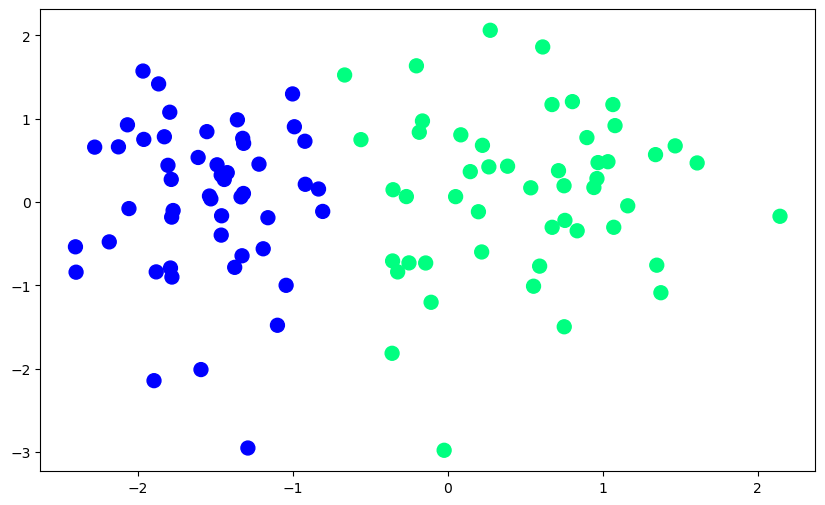

In [1245]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [1246]:
X.shape

(100, 2)

In [1247]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1) # add column at 0th index with all ones.
    weights = np.ones(X.shape[1])  # Also create weight matrix with all ones.
    lr = 0.5
    
    for i in range(1000):
        rand_int = np.random.randint(0, X.shape[0])
        y_pred = step(np.dot(X[rand_int], weights))
        if y[rand_int] != y_pred:
            weights = weights + lr * (y[rand_int] - y_pred) * X[rand_int]
    return weights[0], weights[1:]

In [1248]:
def step(z):
    return 1 if z > 0 else 0

In [1249]:
intercept_, coeff_ = perceptron(X, y)

In [1250]:
print(intercept_)

2.5


In [1251]:
print(coeff_)

[3.04055116 0.75711236]


#### In eqn: Ax+By+c=0, c=intercept_, A=coeff_[0] & B=coeff_[1]

In [1253]:
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[0])
print(f"m: {m}\nb: {b}")

m: -4.01598403740149
b: -0.8222193518415152


#### visualization

In [1255]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

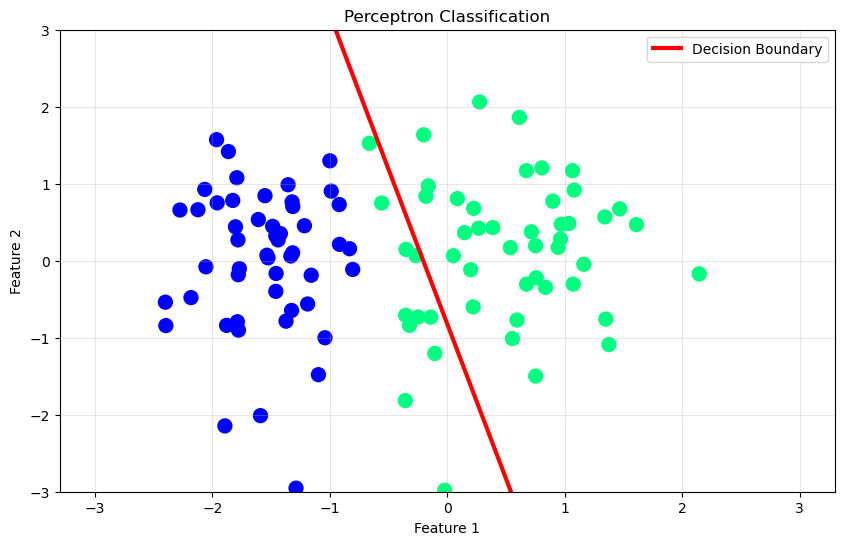

In [1256]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.plot(x_input, y_input, color='r', linewidth=3, label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Classification")
plt.ylim(-3, 3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [1273]:
X_test = np.insert(X, 0, 1, axis=1)
predictions = np.array([step(np.dot(x, np.concatenate([[intercept_], coeff_]))) 
                        for x in X_test])
accuracy = np.mean(predictions == y)
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 96.00%
